# Heart Disease Prediction Model

This notebook demonstrates the process of building a machine learning model to predict heart disease. It covers the following steps:
- Data loading and exploration
- Data preprocessing and encoding
- Exploratory Data Analysis (EDA)
- Model training and evaluation


In [3]:

#Import necessary libraries
import pandas as pd 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


### Load the dataset and explore the first few rows.


In [4]:
# reading data from the csv file heart
data = pd.read_csv('heart.csv') 
pd.set_option('display.max_columns', None)
print("Dataset Overview:")
print(data.info())
print(data.head())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203

# Show the columns names

In [5]:
print("Column Names:")
print(data.columns.tolist())

Column Names:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


### Check if there are any missing values in the dataset.


In [6]:
print(data.isnull().sum()) # this shows that ther is no missing values 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Calculating basic statistics for all numerical columns

In [7]:
statistics = data.describe()
print(statistics)


               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

# ploting histagrams for data from columns with numerical values 

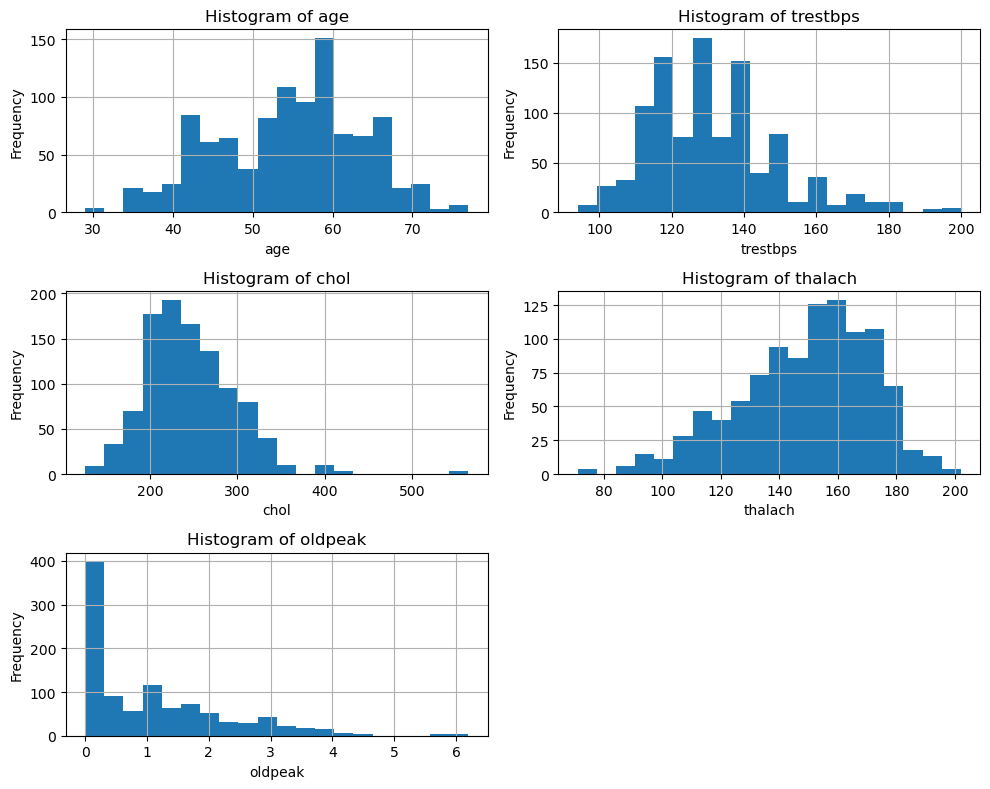

In [8]:
columns_to_plot = ['age', 'trestbps', 'chol', 'thalach' , 'oldpeak']

plt.figure(figsize=(10, 8))  # Setting the figure size
for i, column in enumerate(columns_to_plot):
    plt.subplot(3, 2, i + 1)  # Creating a subplot for each histogram
    data[column].hist(bins=20)  # Adjusting the number of bins for better visualization
    plt.title(f'Histogram of {column}')  # Adding a title to each histogram
    plt.xlabel(column)  # Labeling the x-axis
    plt.ylabel('Frequency')  # Labeling the y-axis

plt.tight_layout()  # Adjusting subplots to fit into figure area.
plt.show()  # Displaying the histograms

#  visualize the frequency distribution of the categorical columns using bar charts

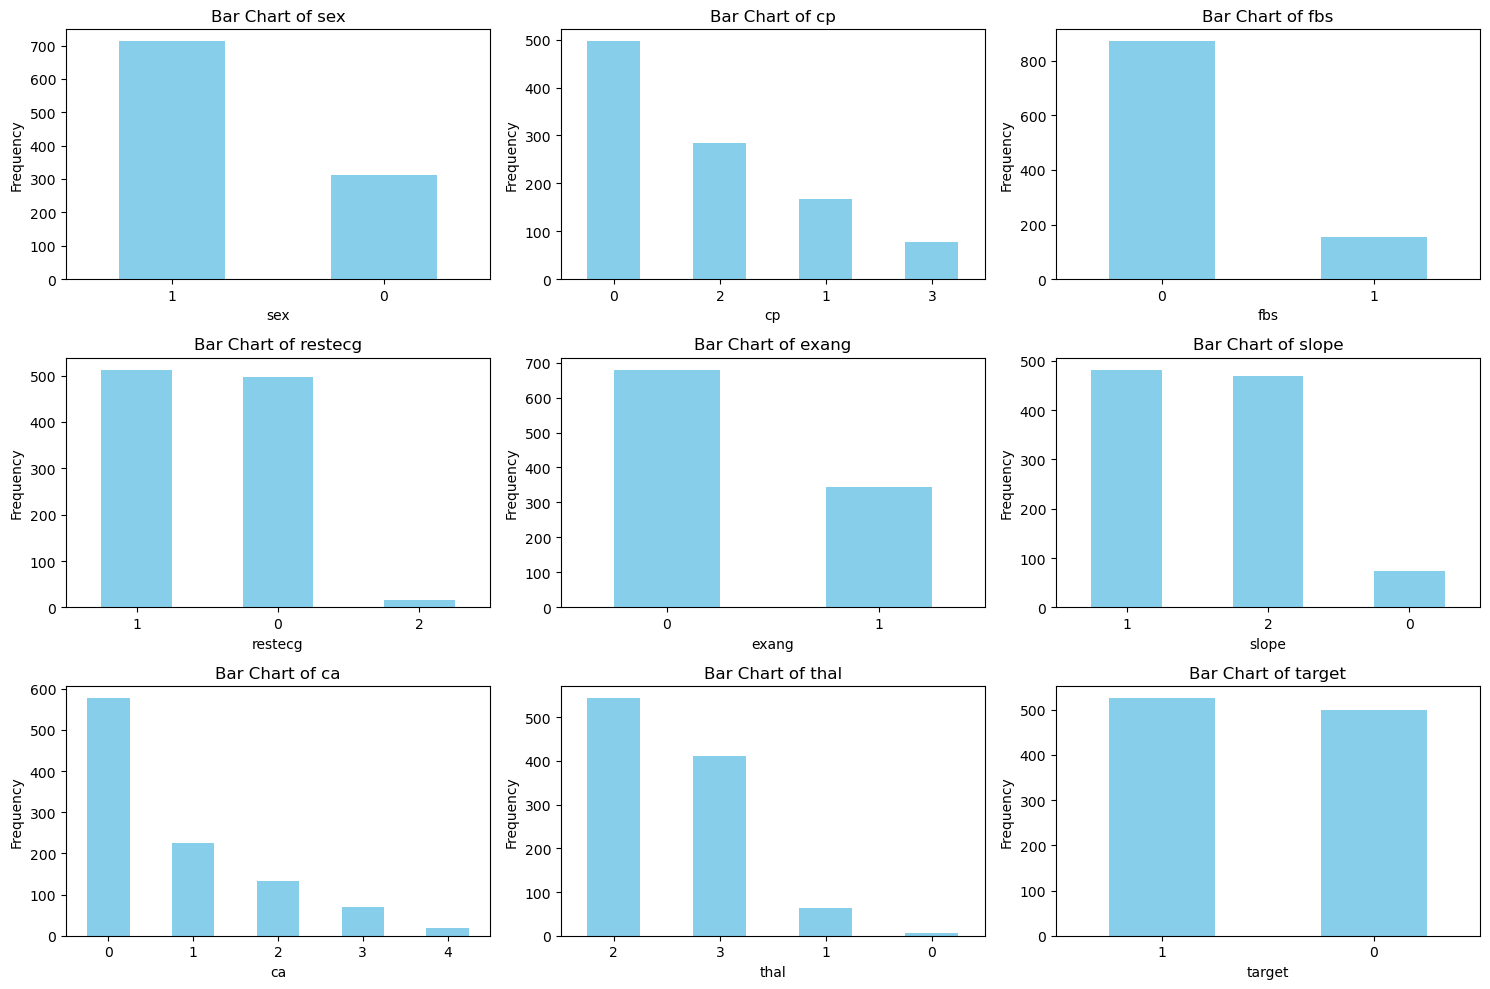

In [9]:
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

plt.figure(figsize=(15, 10))  # Setting the figure size large enough to accommodate multiple subplots
for i, column in enumerate(categorical_columns):
    plt.subplot(3, 3, i + 1)  # Adjusting subplot to 3 rows and 3 columns
    data[column].value_counts().plot(kind='bar', color='skyblue')  # Creating a bar plot for each column
    plt.title(f'Bar Chart of {column}')  # Adding a title to each bar chart
    plt.xlabel(column)  # Labeling the x-axis
    plt.ylabel('Frequency')  # Labeling the y-axis
    plt.xticks(rotation=0)  # Rotating x-axis labels for better visibility

plt.tight_layout()  # Adjusting subplots to fit into figure area.
plt.show()  # Displaying the bar charts

### Standardize numerical values and one-hot encode categorical variables.


In [10]:
# standardizing of numerical values 

columns_to_standardize = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()
data[columns_to_standardize] = scaler.fit_transform(data[columns_to_standardize])

# one-hot encode the 'cp' (chest pain type)
encoder = OneHotEncoder(sparse_output=False , drop= 'first')
categorical_features = ['cp']

#Fit and transform the categorical columns
encoded_categorical_df = pd.DataFrame(encoder.fit_transform(data[categorical_features]), columns=encoder.get_feature_names_out(categorical_features))

# Drop original categorical columns and concatenate the encoded columns
data= data.drop(columns=categorical_features)
data=pd.concat([data, encoded_categorical_df], axis=1)


### Plot histograms for key numerical features.


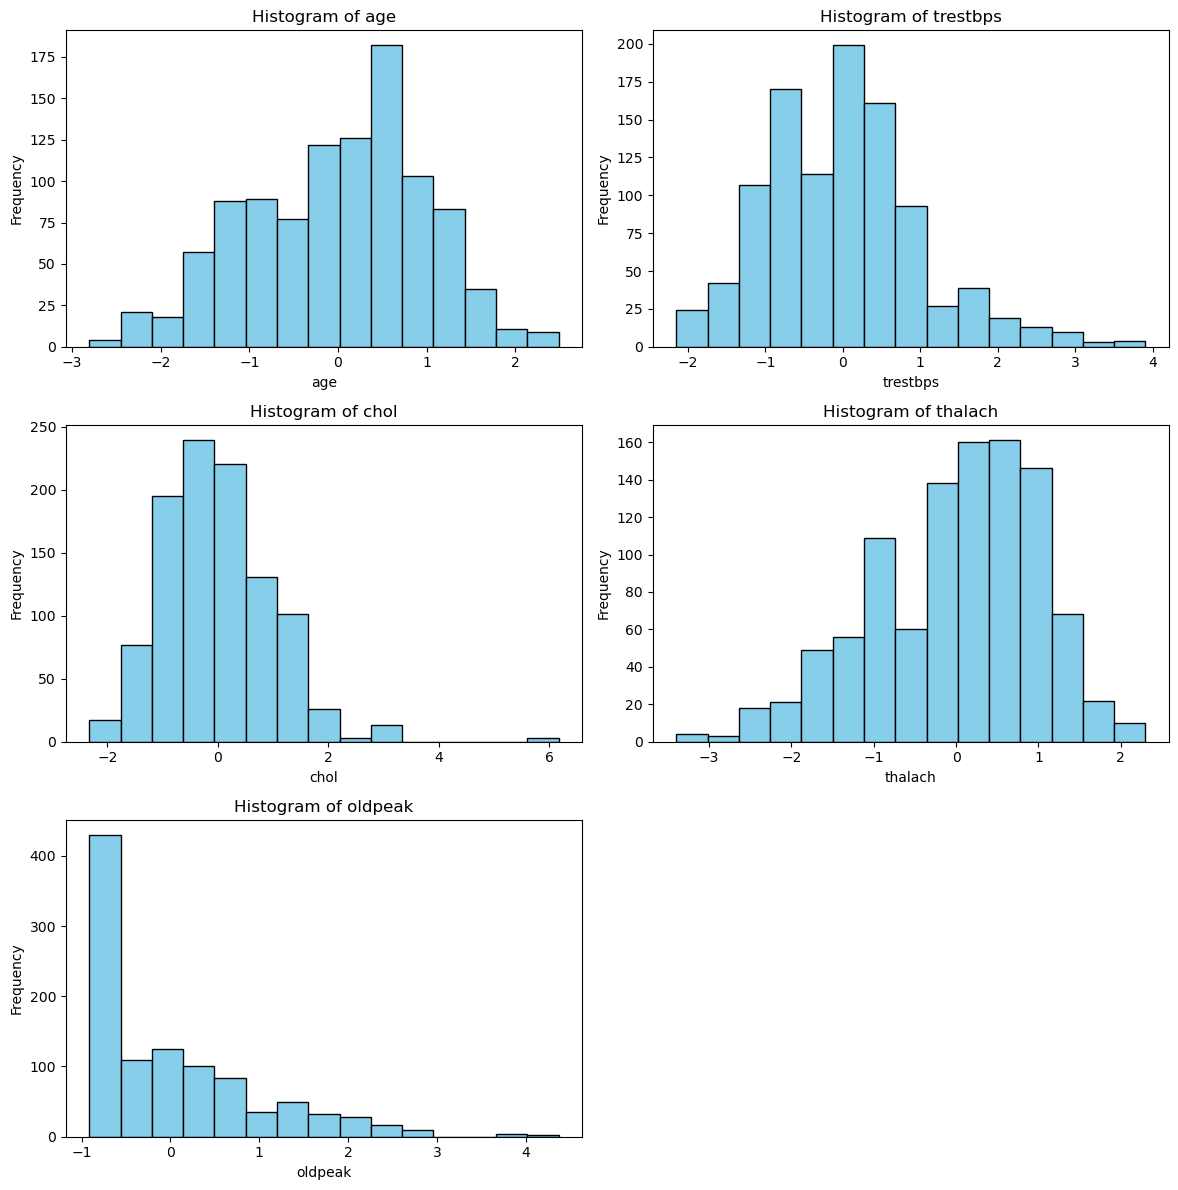

This is data description for selected columns:
                 age      trestbps          chol       thalach       oldpeak
count  1.025000e+03  1.025000e+03  1.025000e+03  1.025000e+03  1.025000e+03
mean  -3.431402e-16 -7.036106e-16 -3.466062e-18 -4.332578e-16 -2.426243e-16
std    1.000488e+00  1.000488e+00  1.000488e+00  1.000488e+00  1.000488e+00
min   -2.804866e+00 -2.148237e+00 -2.327054e+00 -3.397080e+00 -9.123291e-01
25%   -7.095548e-01 -6.632165e-01 -6.787242e-01 -7.442713e-01 -9.123291e-01
50%    1.726817e-01 -9.205458e-02 -1.163527e-01  1.255019e-01 -2.311765e-01
75%    7.240794e-01  4.791073e-01  5.623715e-01  7.343432e-01  6.202642e-01
max    2.488552e+00  3.906079e+00  6.166694e+00  2.299935e+00  4.366603e+00


In [11]:
# Columns to plot
columns_to_plot = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Setting up the plotting area
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))  # Adjust the size as needed
axes = axes.ravel()  # Flatten the array of axes for easy iteration

# Loop through the columns and create a histogram for each
for i, col in enumerate(columns_to_plot):
    axes[i].hist(data[col], color='skyblue', edgecolor='black', bins=15)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# If there are any empty subplots, hide them
for j in range(i+1, len(axes)):
    axes[j].axis('off')  # Turn off axis visibility for the empty subplot

# Display the plot
plt.show()

# Description of selected columns
description = data[columns_to_plot].describe()
print("This is data description for selected columns:\n", description)


### Split the data into training and testing sets.


In [12]:
# Split the data into features (X) and target (y)
X = data.drop(columns=['target'])
y = data['target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets
print("\nShapes After Splitting:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

# Save the processed data to CSV files
X_train.to_csv('X_train_heart.csv', index=False)
X_test.to_csv('X_test_heart.csv', index=False)
y_train.to_csv('y_train_heart.csv', index=False)
y_test.to_csv('y_test_heart.csv', index=False)

print("\nPreprocessing Complete! Files saved.")



Shapes After Splitting:
X_train: (820, 15), X_test: (205, 15), y_train: (820,), y_test: (205,)

Preprocessing Complete! Files saved.


### Train a Logistic Regression model to predict heart disease.


In [13]:
# Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


### Evaluate the performance of the model using accuracy, confusion matrix, and other metrics.


Accuracy of Logistic Regression model: 0.78
              precision    recall  f1-score   support

           0       0.84      0.70      0.76       102
           1       0.74      0.86      0.80       103

    accuracy                           0.78       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.78      0.78       205

Model Performance:
Mean Absolute Error (MAE): 0.22
Root Mean Squared Error (RMSE): 0.47


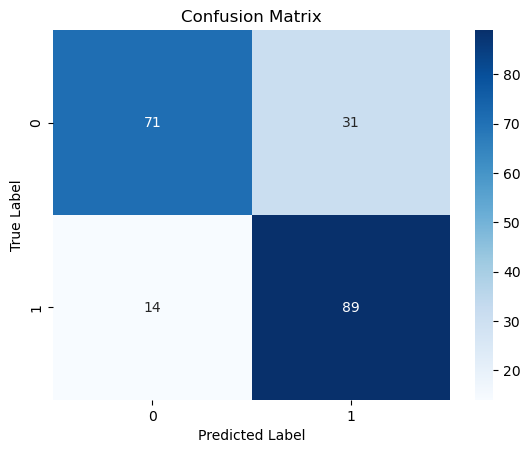

In [14]:
# Import evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error
import seaborn as sns
import numpy as np

# Accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression model: {accuracy:.2f}")

# Mean Absolute Error and Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print detailed classification report and errors
print(classification_report(y_test, y_pred))
print("Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
